In [1]:
## 사람얼굴 p 203

In [13]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [12]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7, color=False)#Download

In [14]:
people.target.shape, len(set(people.target_names)),people.images.shape

((5985,), 423, (5985, 87, 65))

In [15]:
#(87 * 65) 이상의 명암을 주성분 100(10 * 10)개 변환해서 시각화
from sklearn.decomposition import PCA
import numpy as np

In [16]:
87*65

5655

In [17]:
len(set(people.target))

423

In [18]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [19]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [20]:
model = RidgeClassifier(alpha=10).fit(X_train,y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=2.14472e-10): result may not be accurate.
  overwrite_a=False)


In [21]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.08082832331329326)

# 오버피팅!! PCA 해서 다시 도전

In [22]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten : 정규화

In [24]:
pca_x = pca.transform(people.data)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y)
model = RidgeClassifier(alpha=1).fit(X_train,y_train)

In [26]:
model.score(X_train,y_train), model.score(X_test,y_test) # 좀 더 낫다

(0.24554367201426025, 0.17702070808283232)

In [27]:
img = pca.components_.reshape((100,87,65)) # (주성분 갯수, 높이, 너비)
img.shape

(100, 87, 65)

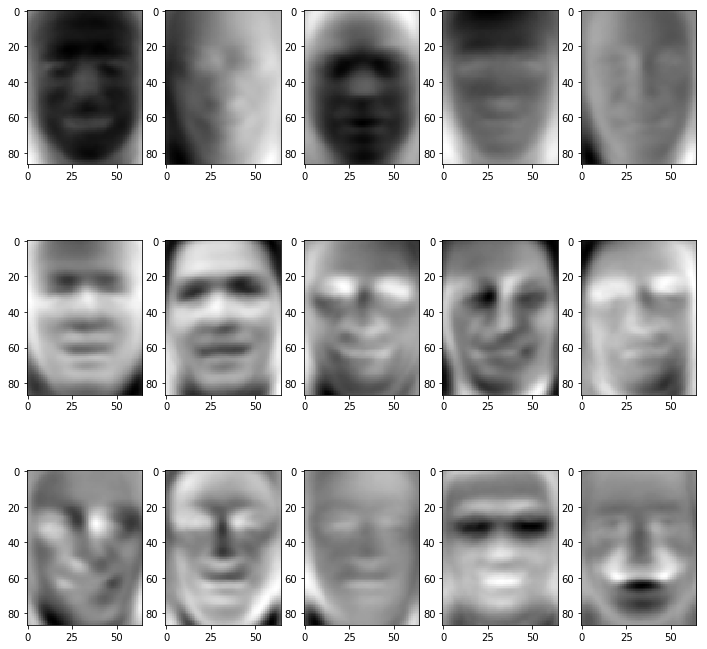

In [28]:
h, w = 3, 5
fig, ax = plt.subplots(h, w, figsize=(12,12))
for y in range(h):
    for x in range(w):
        ax[y,x].imshow(img[y*5+x], cmap='gray')